#### Analysis of TV sales and the impact of advertising on sales.
In this example, I will analyze real TV sales data for the period 08/01/22-11/15/22 in Kazakhstan, in one of the largest retail chains selling electronics and home appliances. The data shown in the example is real, but adjustments have been made to maintain confidentiality. Additional conditions: it is known that in the period 01.10-31.10 an advertising campaign was launched in Google Adwords for the LG brand.
#### Tasks:
1. Analyze TV sales in general.
2. Understand whether the advertising campaign had an impact on sales and analyze how much, if so.
There are two data sets: TV_Data.xlsx - it stores TV sales data and tv_adv - it contains advertising campaign indicators.

We import the first data set and the necessary libraries.

In [903]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
tv_sales = pd.read_excel('C:/TV/TV_Data.xlsx')
tv_sales.head()

,Point of sale,Day,Month,Year,Date,Nomenclature,Channel,Credit,Brand,Price,Margin,Qty
0,San Francisco,1.0,8.0,NaN,1/8/,TV Samsung Q32YH-PB Smart HD,Online,Yes,Samsung,187.1278,28.069170,1
1,San Francisco,6.0,8.0,NaN,6/8/,TV Samsung Q32YH-PB Smart HD,B2B,No,Samsung,310.0847,46.512705,1
2,Austin,4.0,8.0,NaN,4/8/,TV Samsung Q32YH-PB Smart HD,Outlet,No,Samsung,159.3315,23.899725,1
3,San Francisco,6.0,8.0,NaN,6/8/,TV Samsung Q32YH-PB Smart HD,Online,No,Samsung,158.7596,23.813940,1
4,New York,23.0,8.0,NaN,23/8/,TV Samsung Q32YH-PB Smart HD,Online,Yes,Samsung,188.3516,28.252740,1


In [813]:
tv_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Point of sale  4357 non-null   object 
 1   Day            4357 non-null   float64
 2   Month          4357 non-null   float64
 3   Year           3211 non-null   float64
 4   Date           4363 non-null   object 
 5   Nomenclature   4357 non-null   object 
 6   Channel        4357 non-null   object 
 7   Credit         4357 non-null   object 
 8   Brand          4357 non-null   object 
 9   Price          4357 non-null   float64
 10  Margin         4363 non-null   float64
 11  Qty            4363 non-null   int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 409.2+ KB


In [1007]:
# check shape of dataframe
tv_sales.shape

(4363, 12)

In [1008]:
# Now let's see if there are null values in the dataset
tv_sales_noyear = tv_sales[tv_sales['Year'].isna()]
tv_sales_noyear['Year'] = tv_sales['Year'].fillna(2022)
tv_sales_noyear['Year'] = tv_sales_noyear['Year'].astype(int)
tv_sales_noyear.head()

,Point of sale,Day,Month,Year,Date,Nomenclature,Channel,Credit,Brand,Price,Margin,Qty
0,San Francisco,1.0,8.0,2022,1/8/,TV Samsung Q32YH-PB Smart HD,Online,Yes,Samsung,187.1278,28.069170,1
1,San Francisco,6.0,8.0,2022,6/8/,TV Samsung Q32YH-PB Smart HD,B2B,No,Samsung,310.0847,46.512705,1
2,Austin,4.0,8.0,2022,4/8/,TV Samsung Q32YH-PB Smart HD,Outlet,No,Samsung,159.3315,23.899725,1
3,San Francisco,6.0,8.0,2022,6/8/,TV Samsung Q32YH-PB Smart HD,Online,No,Samsung,158.7596,23.813940,1
4,New York,23.0,8.0,2022,23/8/,TV Samsung Q32YH-PB Smart HD,Online,Yes,Samsung,188.3516,28.252740,1


The dataset has null values and dates written in incomplete format. I fill zero values with the number 2022, and also converted it to int type.

Then I will get the full date to make it easier to work. 

In [1010]:
# I combine the 'Year' column with the 'Date' column.
tv_sales_noyear['Date'] = tv_sales_noyear['Date'].astype(str) + tv_sales_noyear['Year'].astype(str)
tv_sales_noyear.head()

,Point of sale,Day,Month,Year,Date,Nomenclature,Channel,Credit,Brand,Price,Margin,Qty
0,San Francisco,1.0,8.0,2022,1/8/2022,TV Samsung Q32YH-PB Smart HD,Online,Yes,Samsung,187.1278,28.069170,1
1,San Francisco,6.0,8.0,2022,6/8/2022,TV Samsung Q32YH-PB Smart HD,B2B,No,Samsung,310.0847,46.512705,1
2,Austin,4.0,8.0,2022,4/8/2022,TV Samsung Q32YH-PB Smart HD,Outlet,No,Samsung,159.3315,23.899725,1
3,San Francisco,6.0,8.0,2022,6/8/2022,TV Samsung Q32YH-PB Smart HD,Online,No,Samsung,158.7596,23.813940,1
4,New York,23.0,8.0,2022,23/8/2022,TV Samsung Q32YH-PB Smart HD,Online,Yes,Samsung,188.3516,28.252740,1


In [821]:
tv_sales_noyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 4362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Point of sale  1146 non-null   object 
 1   Day            1146 non-null   float64
 2   Month          1146 non-null   float64
 3   Year           1152 non-null   int32  
 4   Date           1152 non-null   object 
 5   Nomenclature   1146 non-null   object 
 6   Channel        1146 non-null   object 
 7   Credit         1146 non-null   object 
 8   Brand          1146 non-null   object 
 9   Price          1146 non-null   float64
 10  Margin         1152 non-null   float64
 11  Qty            1152 non-null   int64  
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 112.5+ KB


After displaying information about the DataFrame, I see that there are still rows with null values in it. 

In [1011]:
# Converting the 'Date' column to Datetime format and deleting extra rows with missing values.
tv_sales_noyear['Date'] = pd.to_datetime(tv_sales_noyear['Date'], dayfirst=True)
tv_sales_noyear = tv_sales_noyear.dropna()
tv_sales_noyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1145
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Point of sale  1146 non-null   object        
 1   Day            1146 non-null   float64       
 2   Month          1146 non-null   float64       
 3   Year           1146 non-null   int32         
 4   Date           1146 non-null   datetime64[ns]
 5   Nomenclature   1146 non-null   object        
 6   Channel        1146 non-null   object        
 7   Credit         1146 non-null   object        
 8   Brand          1146 non-null   object        
 9   Price          1146 non-null   float64       
 10  Margin         1146 non-null   float64       
 11  Qty            1146 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(5)
memory usage: 111.9+ KB


In [1012]:
# I'm preparing a second DataFrame with non-null values in the 'Year' column.
tv_sales_yesyear = tv_sales[tv_sales['Year'].notnull()]
tv_sales_yesyear['Date'] = pd.to_datetime(tv_sales_yesyear['Date'], dayfirst=True)

In [1014]:
# I combine the data of two DataFrame and get a clean dataset.
tv_sales_new = pd.concat([tv_sales_noyear, tv_sales_yesyear])
tv_sales_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4357 entries, 0 to 4356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Point of sale  4357 non-null   object        
 1   Day            4357 non-null   float64       
 2   Month          4357 non-null   float64       
 3   Year           4357 non-null   float64       
 4   Date           4357 non-null   datetime64[ns]
 5   Nomenclature   4357 non-null   object        
 6   Channel        4357 non-null   object        
 7   Credit         4357 non-null   object        
 8   Brand          4357 non-null   object        
 9   Price          4357 non-null   float64       
 10  Margin         4357 non-null   float64       
 11  Qty            4357 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 442.5+ KB


Let's move on to data analysis. We look at which brand and which models sell best

In [826]:
tv_sales_new['Brand'].value_counts()

Sony       2255
LG         1309
Samsung     793
Name: Brand, dtype: int64

In [827]:
tv_sales_new['Nomenclature'].value_counts()

TV Sony 43P615 Android 4K UHD         801
TV LG 32H740LB HD Smart               467
TV Sony 50P725 Android 4K UHD         395
TV Sony 40S65A Android Full HD        332
TV Samsung Q50YK-MB Smart 4K UHD      199
TV Sony 32S60A Android HD             198
TV Samsung Q55YK-MB Smart 4K UHD      179
TV LG 43U790LW Smart 4K UHD           175
TV Sony 32D3000 HD                    161
TV Samsung Q32YH-PB Smart HD          157
TV LG 40F500LB Full HD                126
TV Samsung Q65YK-MB Smart 4K UHD      122
TV LG 32H510KD HD                     116
TV LG 43U740LB Smart 4K UHD           111
TV Samsung Q43YK-MB Smart 4K UHD      103
TV LG 55U740LB  Smart 4K UHD           96
TV Sony 55P725 Android 4K UHD          83
TV LG 32H740LW Android HD              80
TV LG 40F740LB FHD Smart               78
TV Sony 32S65A Android HD              73
TV Sony 65P725 Android 4K UHD          49
TV Sony 32S5200 Android TV HD          34
TV Samsung Q40YF-PB Smart Full HD      33
TV Sony 43P725 Android 4K UHD     

The best selling brand is Sony. 3 Sony models are also in the TOP-5. In addition to Sony, Samsung and LG are in the TOP-5.
Now let's see how sales depend on the region.

<AxesSubplot:xlabel='Point of sale'>

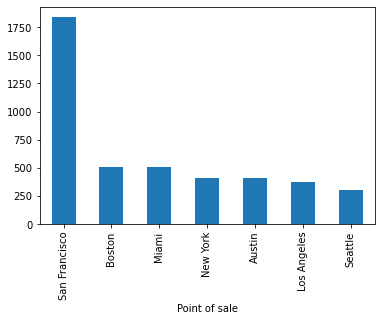

In [828]:
tv_sales_new.groupby('Point of sale')['Qty'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Point of sale'>

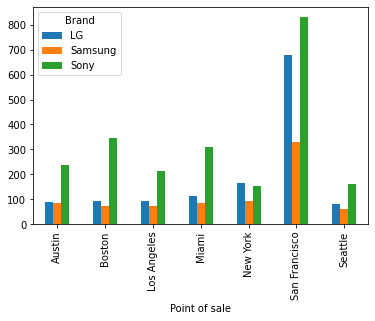

In [829]:
tv_sales_new.groupby(['Point of sale', 'Brand'])['Qty'].sum().unstack().plot(kind='bar')

We see that San Francisco is leading in sales by a wide margin. Inside the cities, the Sony brand is in the lead, everywhere except for New York, where the leader, by a small margin, is the LG brand. In general, the LG brand occupies the 2nd position in sales.

Now let's see through which channel, on what financial terms and with what average price TVs are sold in the sales channel

In [830]:
tv_sales_new['Channel'].value_counts()

Online    2054
Outlet    1821
B2B        482
Name: Channel, dtype: int64

In [977]:
tv_sales_new.pivot_table(index='Channel', values='Price', aggfunc='mean')

,Price
Channel,
B2B,369.377270
Online,226.684748
Outlet,451.335246


In [831]:
tv_sales_new['Credit'].value_counts()

No     2817
Yes    1540
Name: Credit, dtype: int64

<AxesSubplot:xlabel='Channel'>

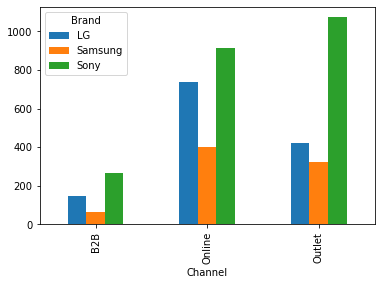

In [832]:
tv_sales_new[['Channel', 'Brand']].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Credit'>

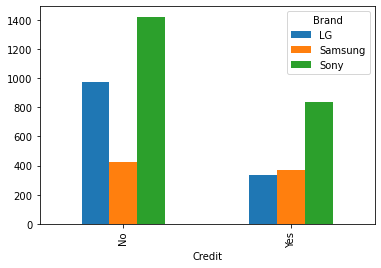

In [833]:
tv_sales_new[['Credit', 'Brand']].value_counts().unstack().plot(kind='bar')

Most purchases are made in the online store (offline outlets are second) and most purchases are made in cash.
Samsung and LG are buying more online, while Sony is selling better in stores. The size of the check is the largest in the outlet.
Samsung buys on credit and cash at a ratio of about 50% to 50%, while Sony and LG charge more for cash. Let's see what this is connected with by comparing brands at prices.

In [834]:
tv_sales_new.groupby(['Brand'])['Price'].mean()

Brand
LG         231.089798
Samsung    318.947824
Sony       403.596288
Name: Price, dtype: float64

Sony initially has a higher price. As an assumption, it is because of this that most often customers buy it in an offline store. Customers want to see a product live before buying. From the price, we also assume that the target audience of the brand is more solvent, and, therefore, can afford to buy the brand for cash, and not on credit. The same can be said about LG. Since its average price is the lowest, the buyer can afford to buy it for cash. Related to this is the fact that it is more often bought online. The product is cheaper and the customer does not want to go to the store to see it. 

In [1015]:
# Now let's see which models sell better within each brand.
tv_sales_new.groupby(['Brand', 'Nomenclature'])['Qty'].sum().sort_values(ascending=False)

Brand    Nomenclature                      
Sony     TV Sony 43P615 Android 4K UHD         801
LG       TV LG 32H740LB HD Smart               467
Sony     TV Sony 50P725 Android 4K UHD         395
         TV Sony 40S65A Android Full HD        332
Samsung  TV Samsung Q50YK-MB Smart 4K UHD      199
Sony     TV Sony 32S60A Android HD             198
Samsung  TV Samsung Q55YK-MB Smart 4K UHD      179
LG       TV LG 43U790LW Smart 4K UHD           175
Sony     TV Sony 32D3000 HD                    161
Samsung  TV Samsung Q32YH-PB Smart HD          157
LG       TV LG 40F500LB Full HD                126
Samsung  TV Samsung Q65YK-MB Smart 4K UHD      122
LG       TV LG 32H510KD HD                     116
         TV LG 43U740LB Smart 4K UHD           111
Samsung  TV Samsung Q43YK-MB Smart 4K UHD      103
LG       TV LG 55U740LB  Smart 4K UHD           96
Sony     TV Sony 55P725 Android 4K UHD          83
LG       TV LG 32H740LW Android HD              80
         TV LG 40F740LB FHD Smart     

In principle, everything here is logical. Cheaper models with 32 diagonals are better sold. However, 40, 43 and 50 diagonals are also popular.

Now let's analyze the sales of each brand over time from 08/01 to 11/15. Here our task is to determine whether the media advertising campaign launched in Google Adwords for the period 01.10-31.10 somehow affected the sales of the LG brand.

Text(0, 0.5, 'Qty')

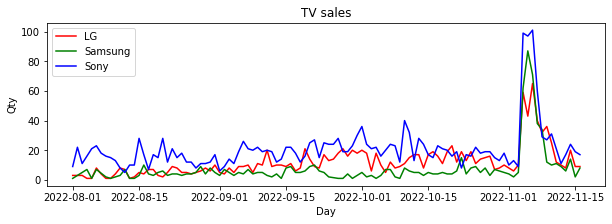

In [836]:
brand = tv_sales_new.groupby(['Brand', 'Date'])['Qty'].sum()
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(brand.loc['LG'], c='red')
ax.plot(brand.loc['Samsung'], c='green')
ax.plot(brand.loc['Sony'], c='blue')
ax.legend(['LG', 'Samsung', 'Sony'])

ax.set_title('TV sales')
ax.set_xlabel('Day')
ax.set_ylabel('Qty')

The graph shows that a slight rise in sales of the LG brand is observed from mid-September to the end of October, and then there is a sharp jump for all brands. Having insider information on the market, I can say that the jump is a period of a weekly sale in the market for all categories of goods from 11/04/22 to 11/13/22.

In [1016]:
# To analyze the impact of advertising on sales and exclude outliers, we will take only the LG brand until 11/04/22
lg_sales = tv_sales_new[(tv_sales_new['Brand'] == 'LG') & (tv_sales_new['Date'].dt.month.isin(range(8, 11)))] 

Text(0, 0.5, 'Qty')

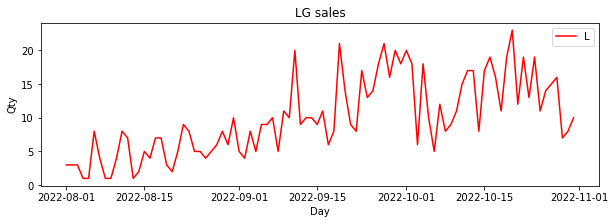

In [895]:
brand = lg_sales.groupby(['Brand', 'Date'])['Qty'].sum()
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(brand.loc['LG'], c='red')
ax.legend('LG')

ax.set_title('LG sales')
ax.set_xlabel('Day')
ax.set_ylabel('Qty')

Let's see if daily ad volume (impression volume) affects daily unit sales. 

In [1021]:
# Let's upload a file with advertising campaign data from Google Adwords.
tv_adv = pd.read_csv('C:/TV/TV_Campaign_Oct.csv', parse_dates=['Day'], dayfirst=True)
tv_adv.head()

,Day,Currency,Clicks,Impression,CTR,Avg CPC,Costs,% in the top position,% imp/ in the top position,Conversions,View-through conversions,Cost/Conversions,Conversion Rate
0,2022-09-05,USD,1 349,71 866,"1,88%","0,03","41,80",0,0,"54,00",0,"0,77","4,00%"
1,2022-09-20,USD,4 410,119 313,"3,70%","0,01","50,55",0,0,"176,00",0,"0,29","3,99%"
2,2022-09-10,USD,370,13 021,"2,84%","0,01","4,25",0,0,"28,00",0,"0,15","7,57%"
3,2022-09-16,USD,5 133,146 896,"3,49%","0,01","58,42",0,0,"218,00",0,"0,27","4,25%"
4,2022-09-18,USD,3 845,119 948,"3,21%","0,01","45,42",0,0,"177,00",0,"0,26","4,60%"


In [1020]:
tv_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Day                          30 non-null     datetime64[ns]
 1   Currency                     30 non-null     object        
 2   Clicks                       30 non-null     object        
 3   Impression                   30 non-null     object        
 4   CTR                          30 non-null     object        
 5   Avg CPC                      30 non-null     object        
 6   Costs                        30 non-null     object        
 7   % in the top position        30 non-null     int64         
 8    % imp/ in the top position  30 non-null     int64         
 9   Conversions                  30 non-null     object        
 10  View-through conversions     30 non-null     int64         
 11  Cost/Conversions             30 non-null     ob

In [1019]:
tv_adv.shape

(30, 13)

In [1022]:
# Converting the required value 'Impression' from the Object type to the Int type
tv_adv['Impression'] = pd.to_numeric(tv_adv['Impression'].str.replace(r"[^\d\-]", ""), errors="coerce")
tv_adv['Costs'] = pd.to_numeric(tv_adv['Costs'].str.replace(r"[^\d\-]", ""), errors="coerce")
tv_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Day                          30 non-null     datetime64[ns]
 1   Currency                     30 non-null     object        
 2   Clicks                       30 non-null     object        
 3   Impression                   30 non-null     int64         
 4   CTR                          30 non-null     object        
 5   Avg CPC                      30 non-null     object        
 6   Costs                        30 non-null     int64         
 7   % in the top position        30 non-null     int64         
 8    % imp/ in the top position  30 non-null     int64         
 9   Conversions                  30 non-null     object        
 10  View-through conversions     30 non-null     int64         
 11  Cost/Conversions             30 non-null     ob

Text(0, 0.5, 'Impression')

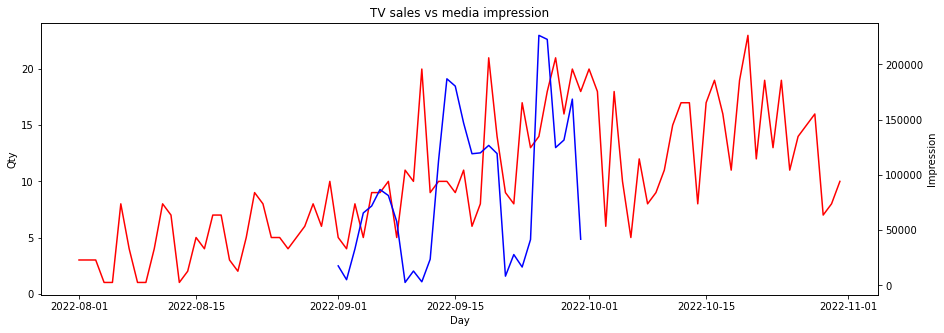

In [1024]:
# We impose sales of the LG brand on the Impressions of the advertising campaign
brand = lg_sales.groupby(['Brand', 'Date'])['Qty'].sum()
fig, ax = plt.subplots(figsize=(15, 5))
ax_twin = ax.twinx()
ax.plot(brand.loc['LG'], c='red', label='LG')
ax_twin.plot(tv_adv.groupby('Day')['Impression'].sum(), c='blue', label='Adv')


ax.set_title('TV sales vs media impression')
ax.set_xlabel('Day')
ax.set_ylabel('Qty')
ax_twin.set_ylabel('Impression')

As can be seen from the graph, if we use only the available data for analysis, we can conclude that the advertising campaign had a positive impact on sales of LG brand TVs. We see no growth in sales in the first week during the start of the advertising campaign and growth in the subsequent week with a tail after the end of the campaign. You can also see how periods of higher ad impressions subsequently lead to higher TV sales.

Let's calculate the ROMI for an advertising campaign

In [913]:
ROMI = round(((lg_sales['Margin'].sum() - tv_adv['Costs'].sum() / 100) / (tv_adv['Costs'].sum() / 100)) * 100)
ROMI

2543

Marketing costs paid off in full.